# Clustering

Bu sayfada Unsupervised Learning yöntemi olan Clustering metodunu öğreneceğim.
Clustering: Veriyi benzerliklerine göre kümelemek

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("cars.xls")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
#reminder:
# Regression -> r2, RMSE
# Classification -> accuracy, f1 score, class_report, con_matrix
# Clustering -> Silhouette Score

In [6]:
x = df[["Price", "Mileage", "Cylinder"]]

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [9]:
model = KMeans(4) #neden 4 yellowbrick

In [10]:
model = model.fit(x)

In [11]:
pred = model.predict(x)

In [12]:
pred

array([2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 3,
       3, 1, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,

In [13]:
x["cluster"] = pred

In [14]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,3


In [15]:
silhouette_score(x, pred)

0.4114527918604497

In [16]:
import matplotlib.pyplot as plt

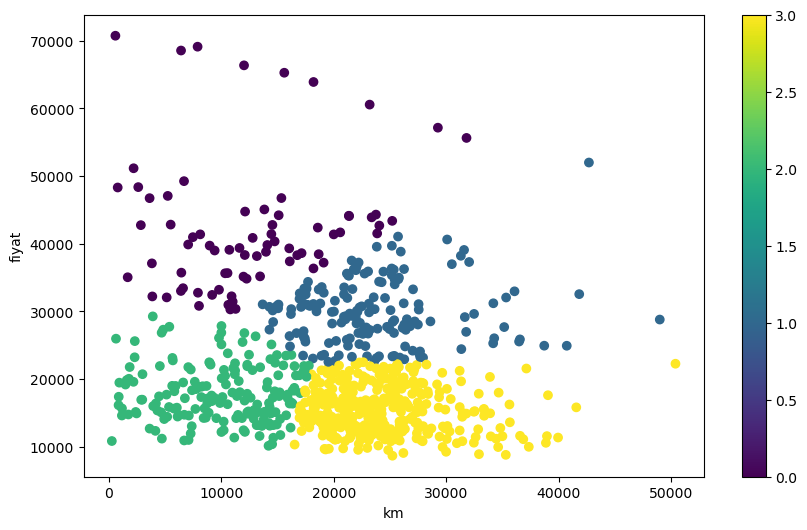

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c = pred)
plt.colorbar();
plt.xlabel("km")
plt.ylabel("fiyat");

In [18]:
#within cluster sum of squares
wcss = []
ss=[]
for i in range(2,10):
    model = KMeans(i) 
    model = model.fit(x)
    tahmin = model.predict(x)
    ss1 = silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4517011914031933
0.41321086497113924
0.4132860958001791
0.3549440711103061
0.3634361549087024
0.36142084736857427
0.367997598761391
0.3496286117118191


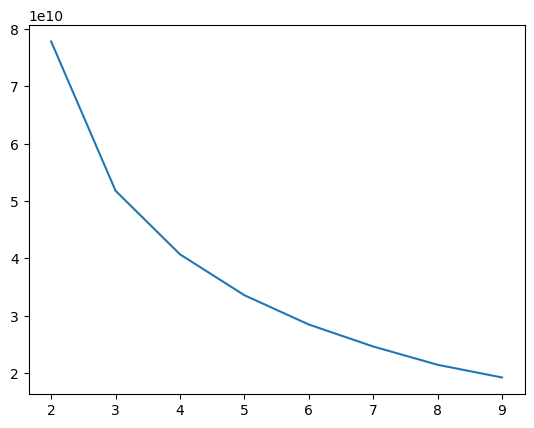

In [19]:
plt.plot(range(2,10), wcss)

In [20]:
import seaborn as sns

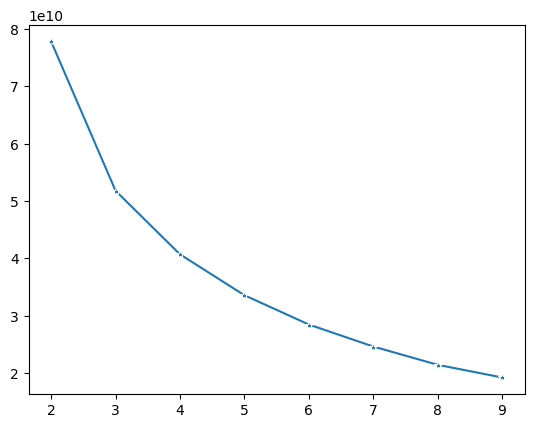

In [21]:
sns.lineplot(x = range(2,10), y = wcss, marker = "*");

In [22]:
#pip install yellowbrick #ilkel olmayan yöntem :)

In [23]:
from yellowbrick.cluster import KElbowVisualizer

In [24]:
km = KMeans()

In [25]:
vis = KElbowVisualizer(km,k=(2,10))

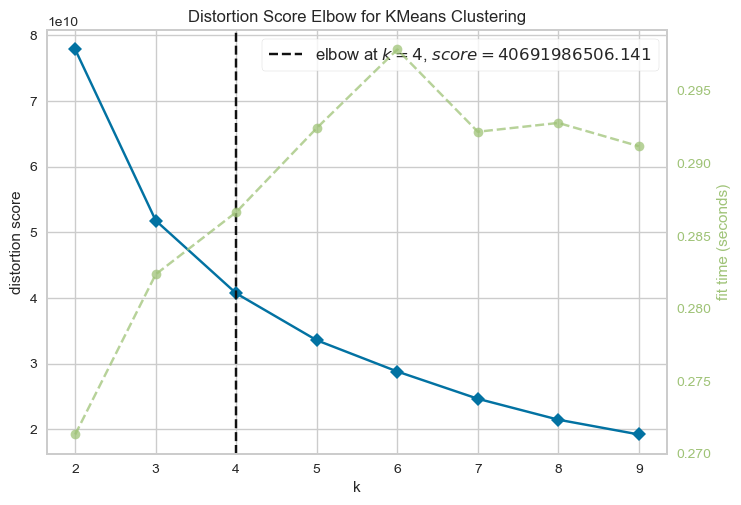

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
vis.fit(x)
vis.show()

In [27]:
#hierachical clustering

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
data = linkage(x,method="ward", metric="euclidean")

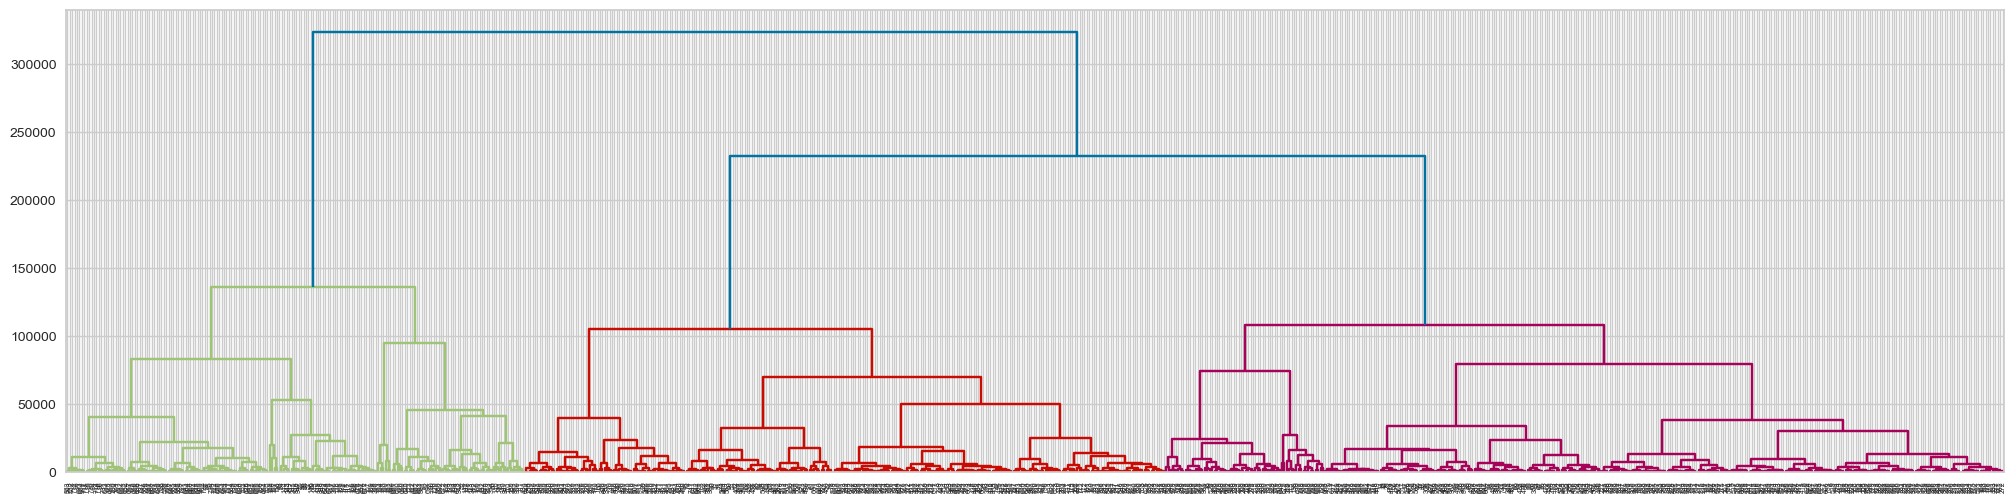

In [30]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [31]:
df= pd.read_csv("Billionaires.csv")

In [32]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

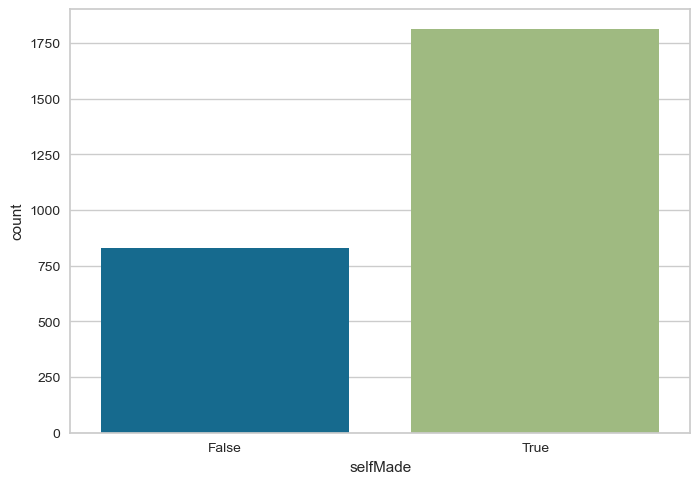

In [33]:
sns.countplot(x = df["selfMade"])

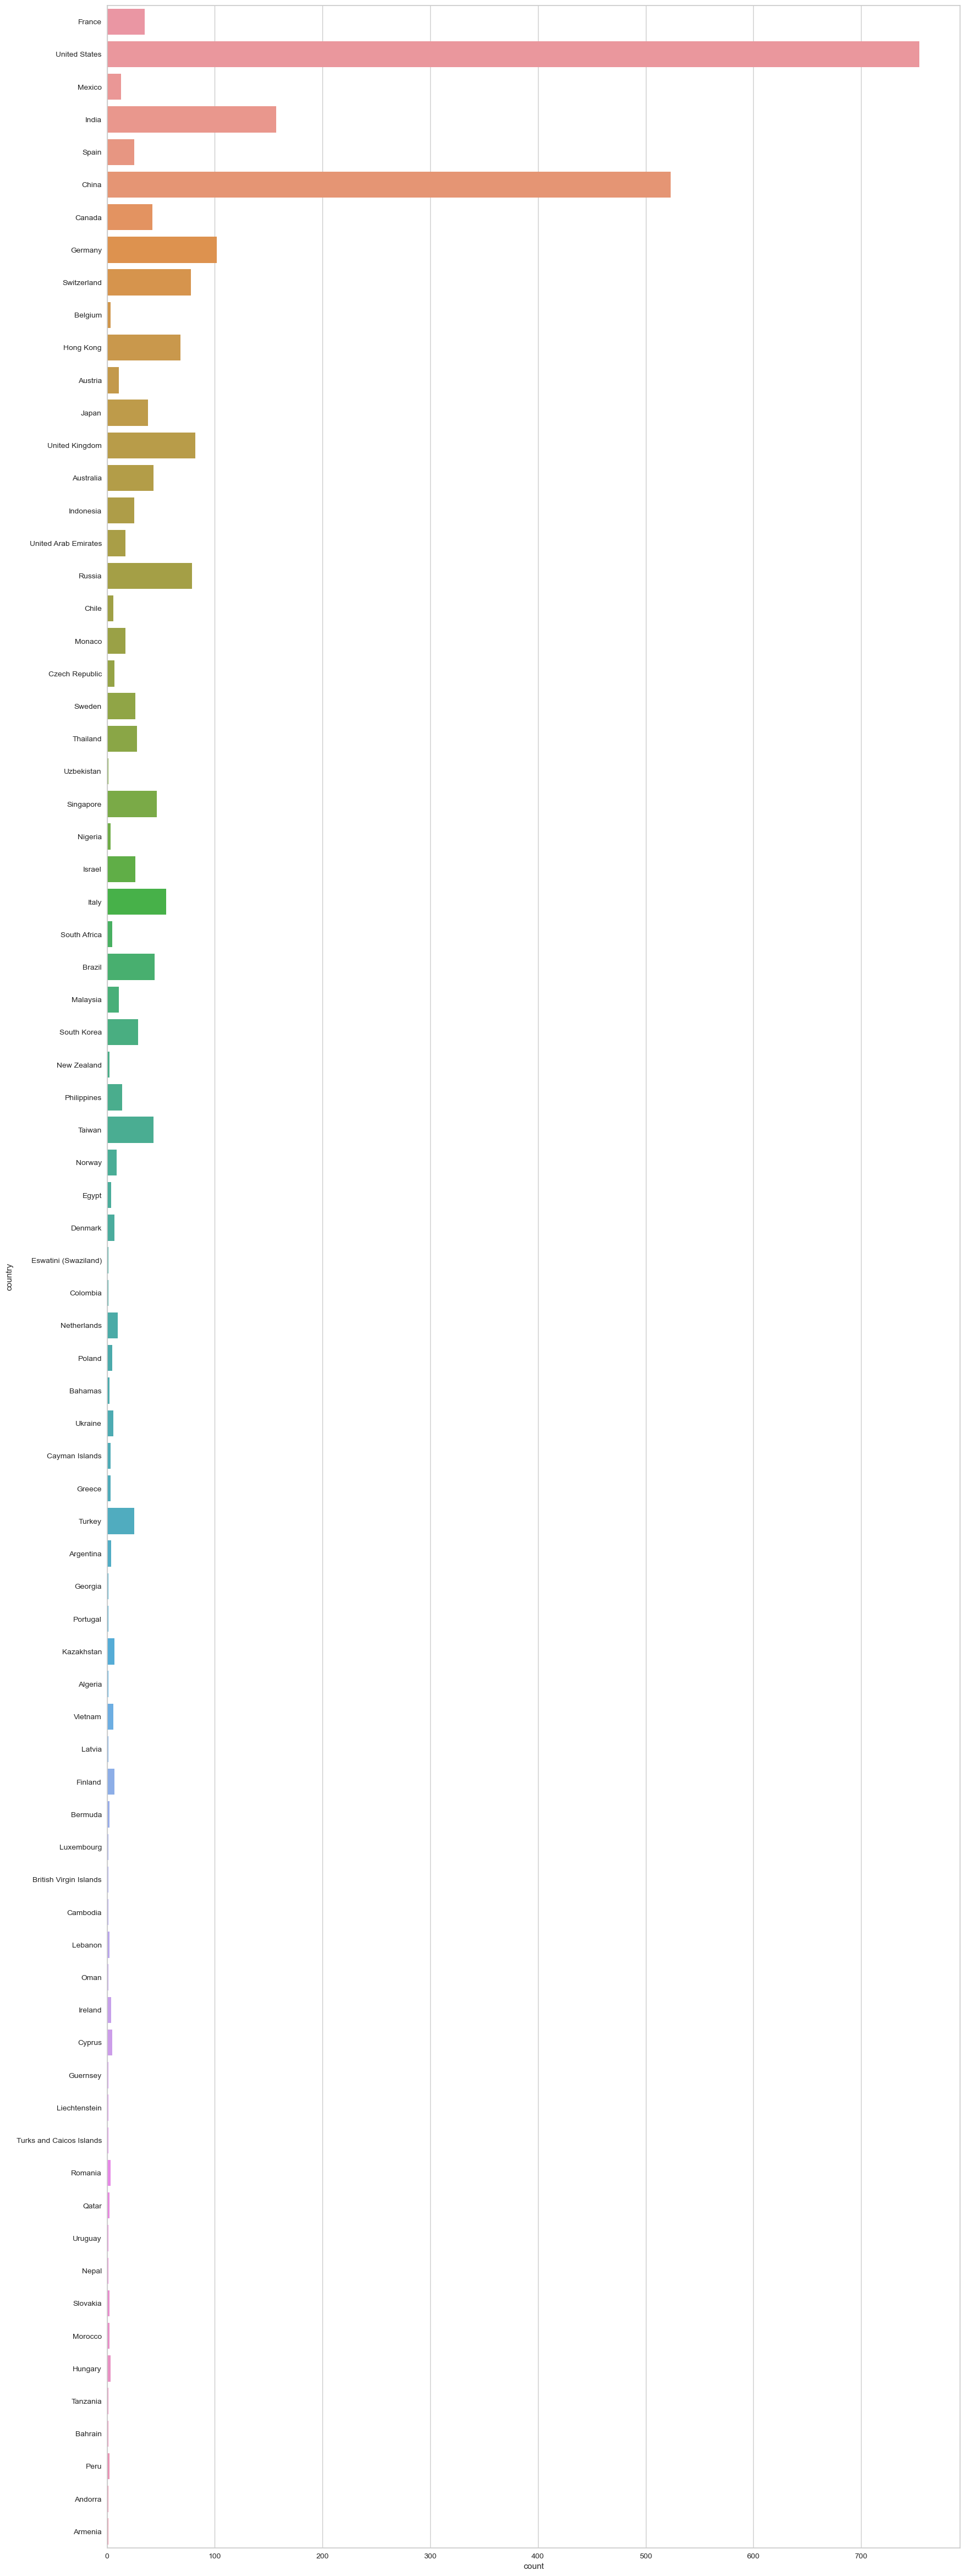

In [34]:
plt.figure(figsize=(20,60))
sns.countplot(y = df["country"]);

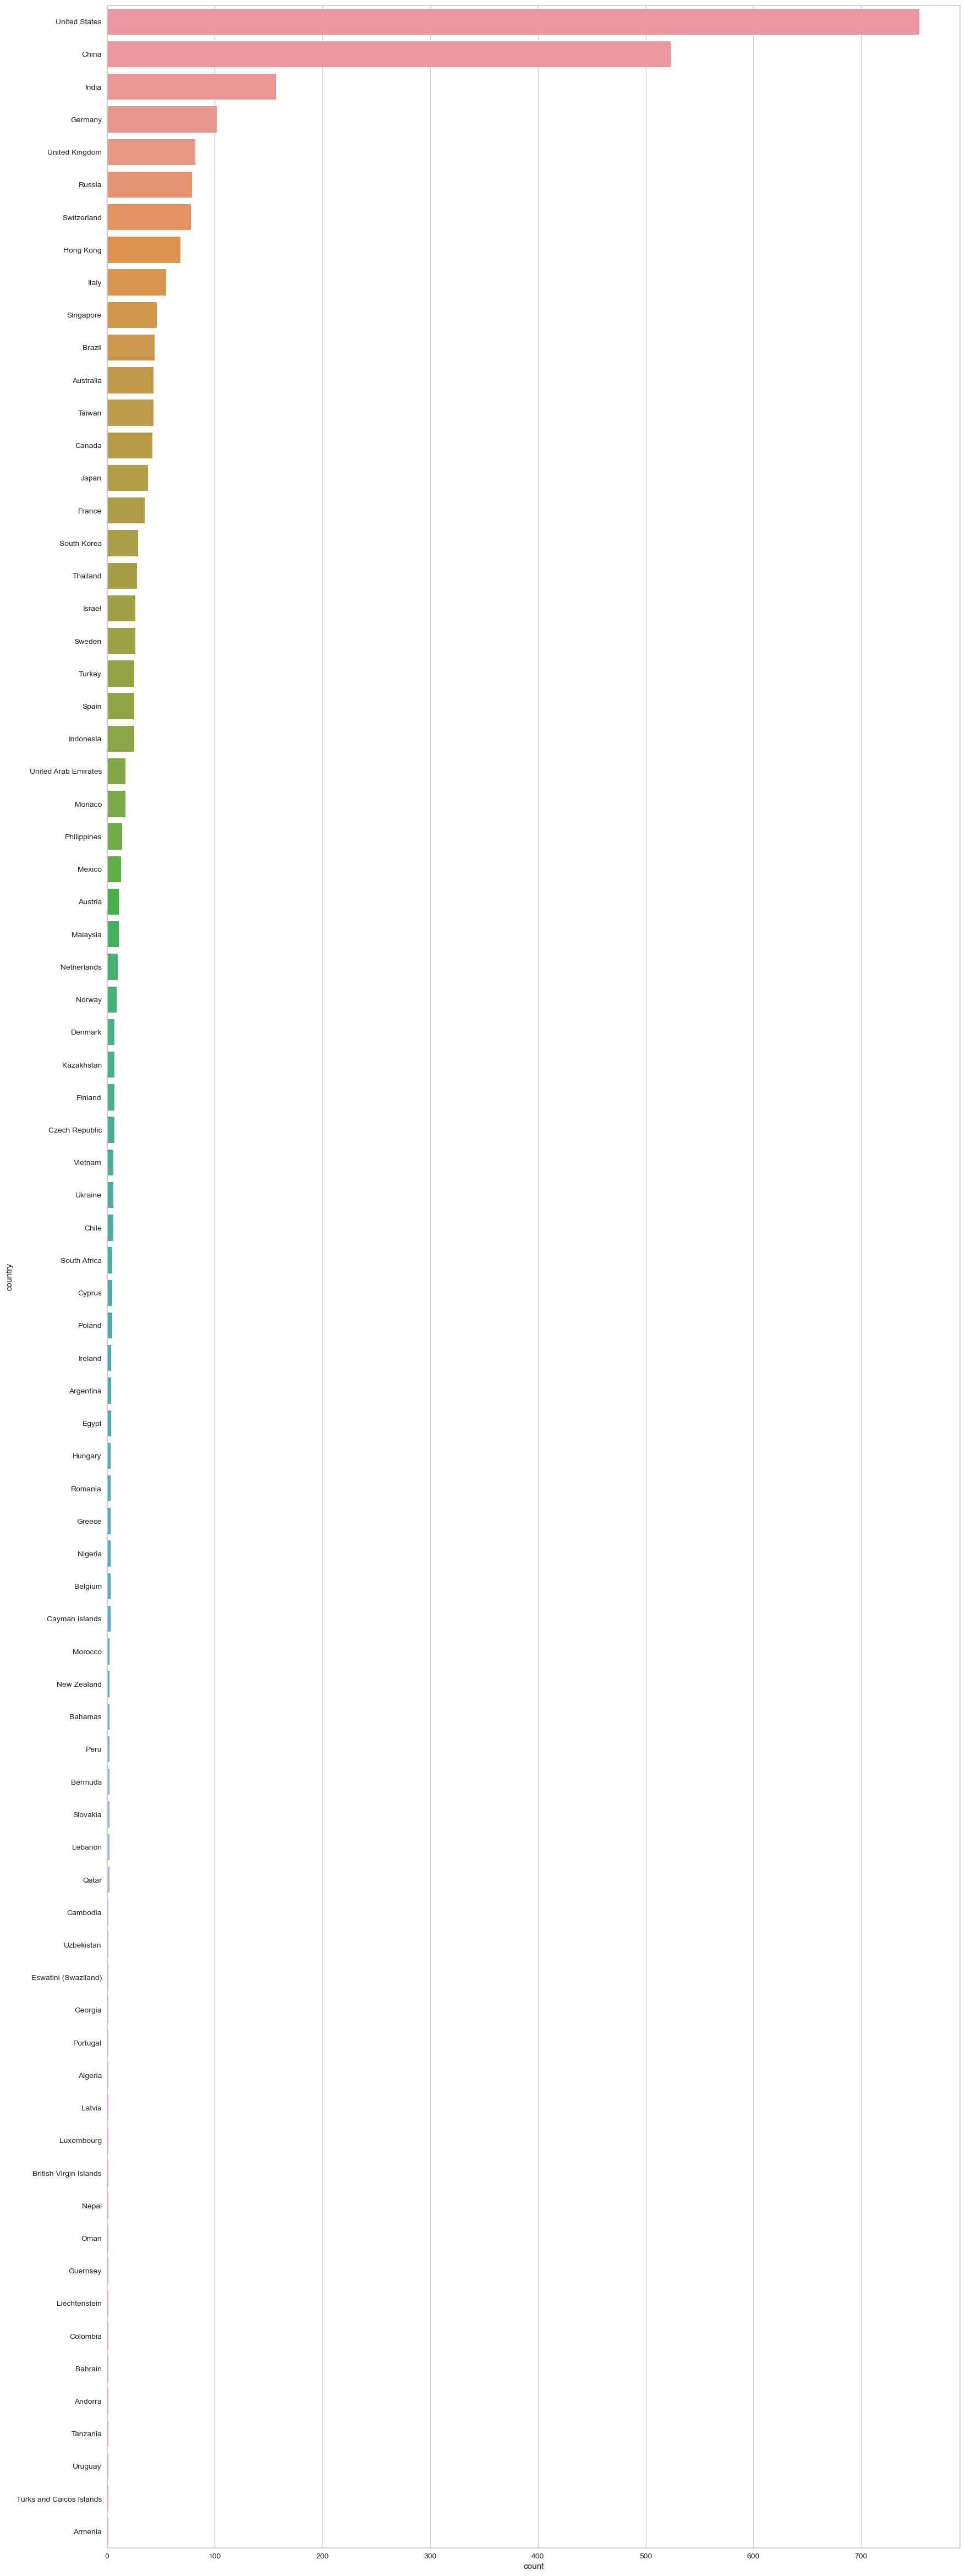

In [35]:

ydf = df["country"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y = df["country"], order = ydf.index);

In [36]:
tr = df[df["country"] == "Turkey"] 

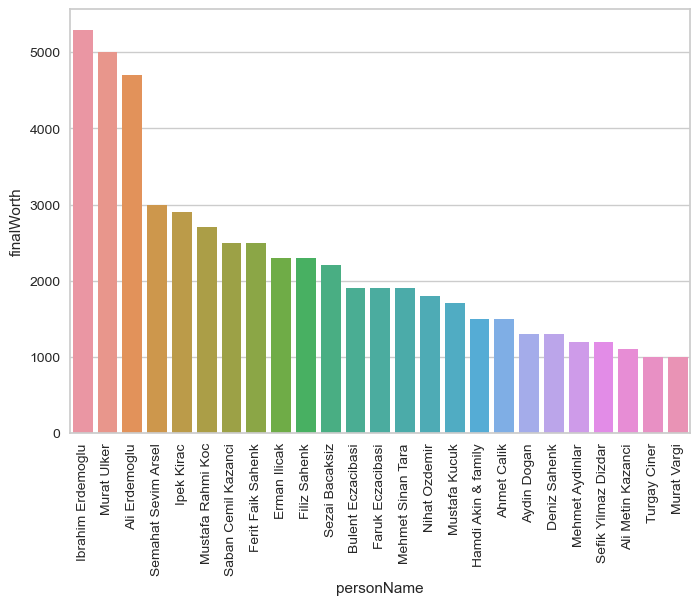

In [37]:
sns.barplot(x = tr["personName"] , y = tr["finalWorth"])
plt.xticks(rotation = 90);

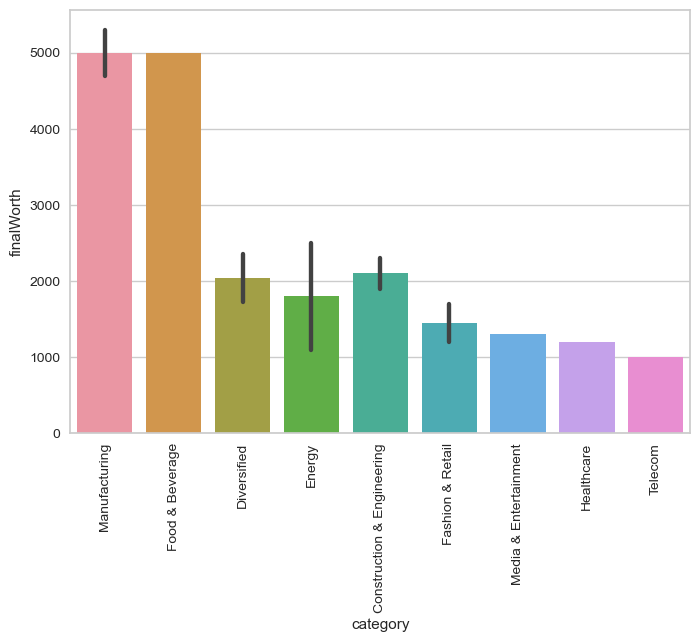

In [38]:
sns.barplot(x = tr["category"] , y = tr["finalWorth"])
plt.xticks(rotation = 90);

<Axes: xlabel='gender', ylabel='count'>

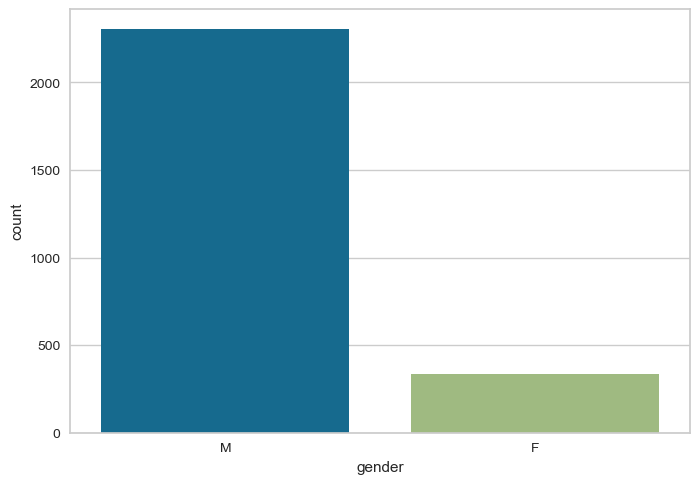

In [39]:
sns.countplot(x = df["gender"])

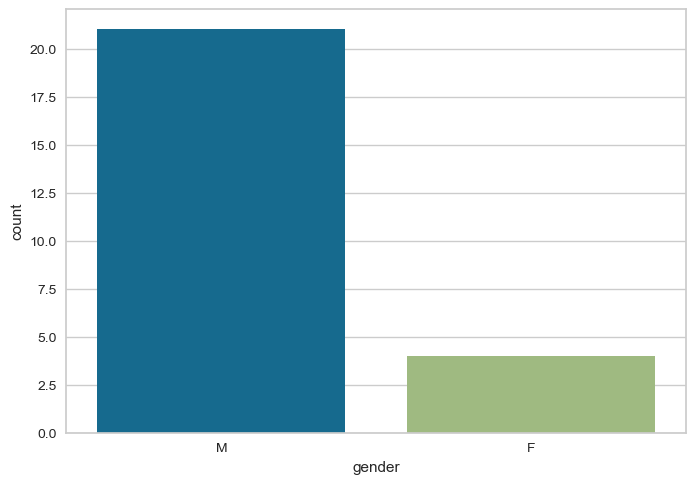

In [40]:
sns.countplot(x = tr["gender"]);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manufacturing'),
  Text(1, 0, 'Food & Beverage'),
  Text(2, 0, 'Diversified'),
  Text(3, 0, 'Energy'),
  Text(4, 0, 'Construction & Engineering'),
  Text(5, 0, 'Fashion & Retail'),
  Text(6, 0, 'Media & Entertainment'),
  Text(7, 0, 'Healthcare'),
  Text(8, 0, 'Telecom')])

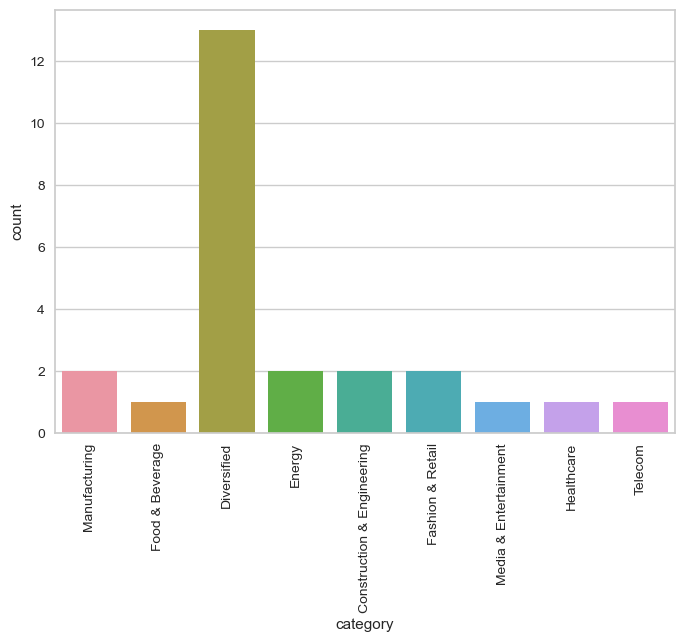

In [50]:
sns.countplot(x = tr["category"]);
plt.xticks(rotation =90)
